# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

---
title: Palmer Penguins Modeling Regression
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

In [41]:
import palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *

In [17]:
penguins = load_penguins()

In [18]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [19]:
penguins.dropna(inplace=True)

In [20]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()
categorical_columns = ['sex','species', 'island']
for column in categorical_columns:
    penguins[column] = penguins[column].fillna('Unknown')  
    penguins[column] = label_encoder.fit_transform(penguins[column])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,2009
340,1,1,43.5,18.1,202.0,3400.0,0,2009
341,1,1,49.6,18.2,193.0,3775.0,1,2009
342,1,1,50.8,19.0,210.0,4100.0,1,2009


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
y = penguins['bill_depth_mm']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(penguins.drop(columns=['bill_depth_mm']), y, test_size=0.25, random_state=42)

In [49]:
train_errors = {}
test_errors = {}

In [56]:
predictor_sets = [
    ['bill_length_mm', 'flipper_length_mm'],       
    ['body_mass_g', 'bill_length_mm', 'species'],                       
    ['body_mass_g', 'flipper_length_mm', 'sex'],  
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'sex','year']  
]

In [57]:
for i, predictors in enumerate(predictor_sets):
    X_train_subset = X_train[predictors]
    X_test_subset = X_test[predictors]

    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    train_errors[f'Model {i+1}'] = mean_squared_error(y_train, model.predict(X_train_subset))
    test_errors[f'Model {i+1}'] = mean_squared_error(y_test, model.predict(X_test_subset))


print("Training Errors:")
for model, error in train_errors.items():
    print(f"{model}: {error}")

print("\nTest Errors:")
for model, error in test_errors.items():
    print(f"{model}: {error}")

Training Errors:
Model 1: 2.2900344294905954
Model 2: 0.7842688151515377
Model 3: 1.2720695395169597
Model 4: 0.6892922095547578

Test Errors:
Model 1: 2.8500483736611457
Model 2: 1.3014703829216312
Model 3: 1.5212328562759962
Model 4: 1.1292287288320224


In [58]:
error_df = pd.DataFrame({
    'Model': list(train_errors.keys()),
    'Train Error': list(train_errors.values()),
    'Test Error': list(test_errors.values())
})
error_df

,Model,Train Error,Test Error
0,Model 1,2.290034,2.850048
1,Model 2,0.784269,1.301470
2,Model 3,1.272070,1.521233
3,Model 4,0.689292,1.129229


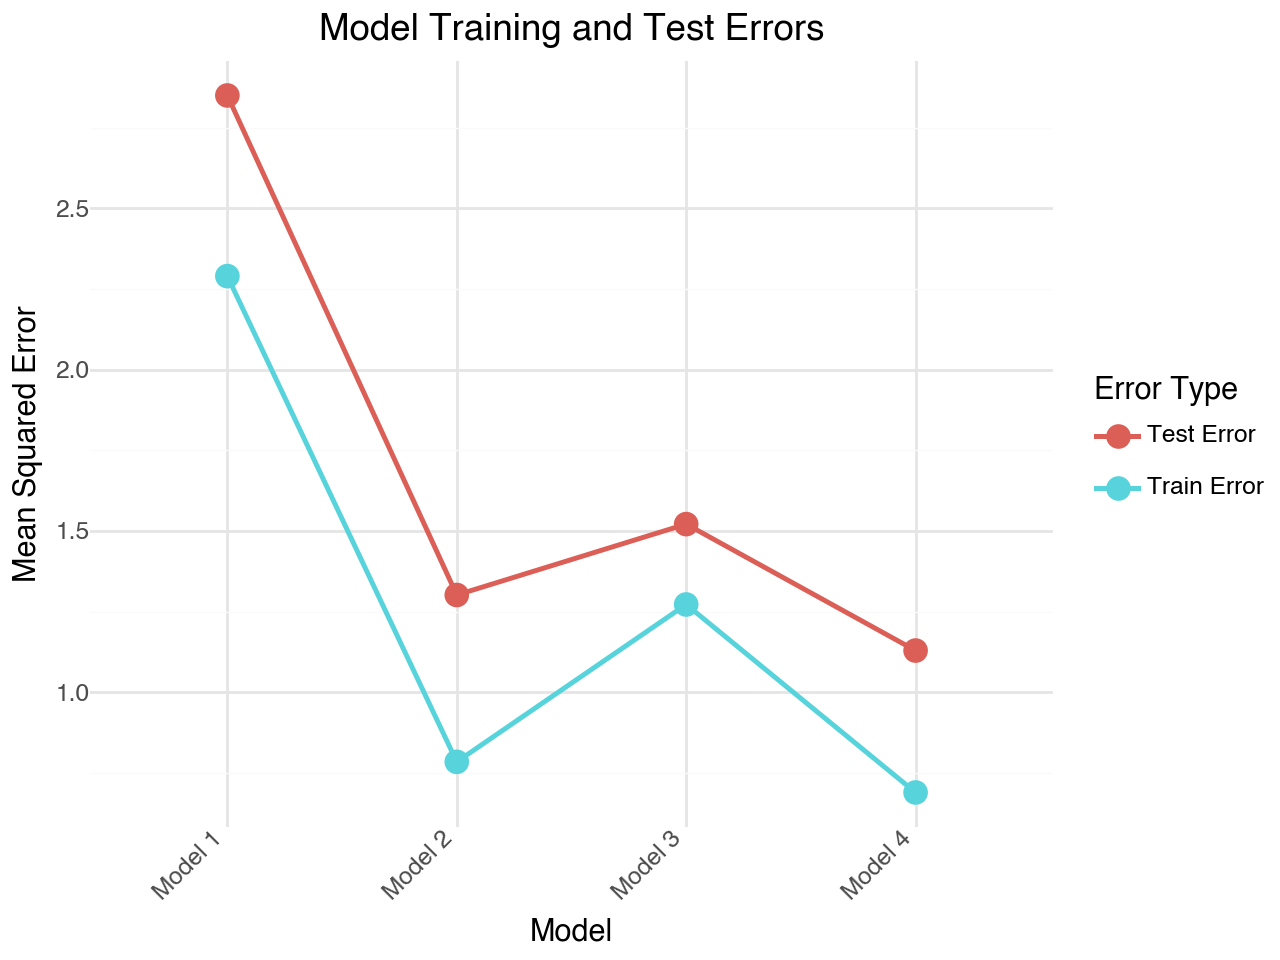

In [59]:
error_long_df = error_df.melt(id_vars='Model', value_vars=['Train Error', 'Test Error'], 
                               var_name='Error Type', value_name='Mean Squared Error')


plot = (ggplot(error_long_df, aes(x='Model', y='Mean Squared Error', color='Error Type', group='Error Type')) +
        geom_point(size=4) +  
        geom_line(size=1) +   
        labs(title='Model Training and Test Errors',
             x='Model',
             y='Mean Squared Error') +
        theme_minimal() +
        theme(axis_text_x=element_text(angle=45, hjust=1))   
)

plot.show()

Model 4 efficiently captures the relationship between the predictor variables and the target variable (bill_depth_mm) while maintaining a low error on both the training and test sets. This suggests that the model not only fits the training data well but also generalizes better to new data compared to the other models.